TALLER HELADO CON MÓDELO NAIVE BAYES

Kevin Alexis López Camacho - 30000117437

**Naive Bayes**: es un algoritmo de clasificación supervisada que utiliza el teorema de Bayes para predecir una clase basándose en la probabilidad. Se llama "naive" (ingenuo) porque asume que todas las características de entrada son independientes entre sí, lo que simplifica enormemente los cálculos. Es un algoritmo de aprendizaje automático rápido, eficiente y escalable, muy utilizado en tareas como el filtrado de spam y la clasificación de textos.

**Base probabilística**: Utiliza el teorema de Bayes para calcular la probabilidad de que un conjunto de características pertenezca a una clase determinada. 

Este teorema se basa en calcular la probabilidad de que ocurra un cierto evento ‘A’, dado que ya ha ocurrido otro evento anterior ‘B’, lo que se denomina probabilidad condicional.

**USO**

Uno de los problemas más clásicos para ilustrar la utilidad de Naive Bayes es el clasificador de spam, donde el algoritmo analiza los correos electrónicos e intenta evaluar si son spam o no. Comenzar con esta aplicación, tiene una razón, ya que este es un algoritmo de uso frecuente para problemas de procesamiento de lenguaje natural.

Además, también es muy utilizado en el campo de la salud, como en diagnósticos médicos, determinando si el paciente tiene o no una enfermedad.

También es posible encontrar versiones del algoritmo en sistemas de recomendación, como el filtrado colaborativo y otros. En este caso, el objetivo de Naive Bayes es predecir si a un usuario le gustará o no un determinado recurso, y así sugerirle algo que pueda interesarle.

O sea, Naive Bayes es un algoritmo con aplicaciones muy versátiles, debiendo ser utilizado en los casos en que las variables sean condicionalmente independientes. También es un algoritmo que presenta un óptimo desempeño clasificando categorías muy bien separadas y para datos con dimensiones altas, donde la complejidad del modelo es menos importante.

En nuestro caso sera usado para la clasificación en el dataset de "ADULT INCOME" para saber si una persona gana 50k o no.

**TIPOS DE CLASIFICADORES PARA NAIVE BAYES**

1. GaussianNB: Este se usa cuando mis features son medidas reales como por ejemplo la edad, altura, temperatura. Se utiliza cuando las características de los datos son continuas y asume que los datos siguen una distribución normal (gaussiana).

2. MultinomialNB: Es el tipo más utilizado cuando los datos son discretos, como las frecuencias de palabras en un documento. Osea si son features de conteo como palabras o clicks.

3. BernouliNB: Se utiliza para variables predictoras booleanas (con dos valores, como verdadero/falso o 1/0). 




In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns

**CARGA DEL DATASET ESTÁTICO**


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
df = pd.read_csv(url, names=columns, na_values=" ?", sep=",", skipinitialspace=True)
df.dropna(inplace=True)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Mapeo para pasar las columnas a datos númericos**

In [5]:
df["workclass"] = df["workclass"].map({
    "Private": 0, "Self-emp-not-inc": 1, "Self-emp-inc": 2,
    "Federal-gov": 3, "Local-gov": 4, "State-gov": 5, "Without-pay": 6, "Never-worked": 7
})

In [6]:
df["marital-status"] = df["marital-status"].map({
    "Married-civ-spouse": 0, "Divorced": 1, "Never-married": 2,
    "Separated": 3, "Widowed": 4, "Married-spouse-absent": 5, "Married-AF-spouse": 6
})

In [7]:
df["occupation"] = df["occupation"].map({
    "Tech-support": 0, "Craft-repair": 1, "Other-service": 2, "Sales": 3, "Exec-managerial": 4,
    "Prof-specialty": 5, "Handlers-cleaners": 6, "Machine-op-inspct": 7, "Adm-clerical": 8,
    "Farming-fishing": 9, "Transport-moving": 10, "Priv-house-serv": 11, "Protective-serv": 12,
    "Armed-Forces": 13
})

In [8]:
df["relationship"] = df["relationship"].map({
    "Wife": 0, "Own-child": 1, "Husband": 2, "Not-in-family": 3, "Other-relative": 4, "Unmarried": 5
})

In [9]:
df["race"] = df["race"].map({
    "White": 0, "Black": 1, "Asian-Pac-Islander": 2, "Amer-Indian-Eskimo": 3, "Other": 4
})

In [10]:
df["sex"] = df["sex"].map({"Male": 0, "Female": 1})

In [11]:
df["income"] = df["income"].map({"<=50K": 0, ">50K": 1})

**Se borran las columnas que no usaremos**

In [12]:
df = df.drop(["fnlwgt", "education", "native-country"], axis=1)

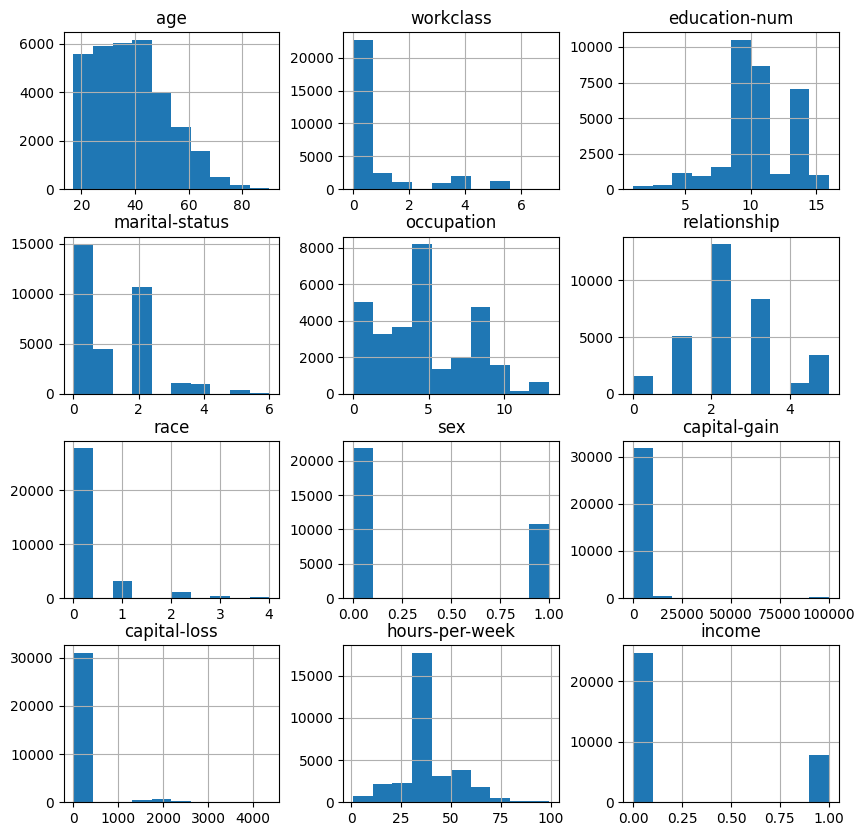

In [13]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10))
plt.show()

**Para descubrir cuantos valores NaN hay por columnas**

In [14]:
df.isna().sum()

age                  0
workclass         1836
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
income               0
dtype: int64

**Rellenar esos valores NaN con la media de los datos de las columnas.**

In [15]:
from sklearn.impute import SimpleImputer

Columnas = df.select_dtypes(include=['int64', 'float64']).columns
Media = SimpleImputer(strategy = 'mean')
df[Columnas] = Media.fit_transform(df[Columnas])
df.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39.0,5.0,13.0,2.0,8.0,3.0,0.0,0.0,2174.0,0.0,40.0,0.0
1,50.0,1.0,13.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,13.0,0.0
2,38.0,0.0,9.0,1.0,6.0,3.0,0.0,0.0,0.0,0.0,40.0,0.0
3,53.0,0.0,7.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,40.0,0.0
4,28.0,0.0,13.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,40.0,0.0
5,37.0,0.0,14.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,40.0,0.0
6,49.0,0.0,5.0,5.0,2.0,3.0,1.0,1.0,0.0,0.0,16.0,0.0
7,52.0,1.0,9.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,45.0,1.0
8,31.0,0.0,14.0,2.0,5.0,3.0,0.0,1.0,14084.0,0.0,50.0,1.0
9,42.0,0.0,13.0,0.0,4.0,2.0,0.0,0.0,5178.0,0.0,40.0,1.0


**Revisamos la clase mayoritaria y minoritaria para saber que balanceo aplicar**

In [18]:
income_counts = df['income'].value_counts()
print("Value counts for the income: ")
print(income_counts)

Value counts for the income: 
income
0.0    24720
1.0     7841
Name: count, dtype: int64


In [20]:
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

In [21]:
df.shape

(32561, 12)

**Separamos las variables independientes de la variable dependiente**

In [22]:
features = [
    "age", "workclass", "education-num", "marital-status","occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week"]

X = df[features]
y = df["income"]

**Realizamos el entrenamiento a los datos.**

In [24]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del entrenamiento: {X_train.shape}")
print(f"Tamaño del test: {X_test.shape}")


Tamaño del entrenamiento: (22792, 11)
Tamaño del test: (9769, 11)


**Hacemos balanceo Smote, y con fit, hacemos balanceo a esos datos ya entrenados.**

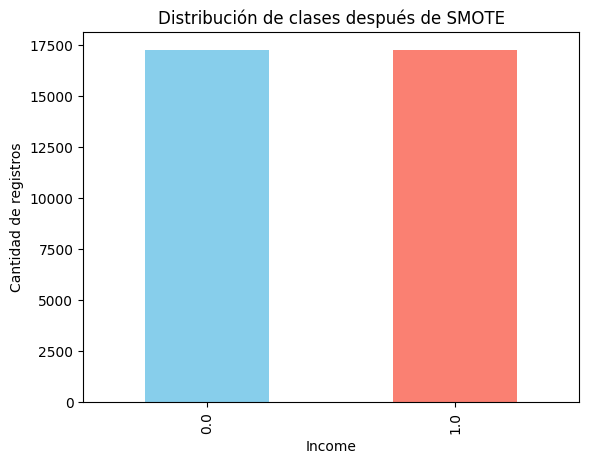

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

pd.Series(y_resampled).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de clases después de SMOTE')
plt.xlabel('Income')
plt.ylabel('Cantidad de registros')
plt.show()



**Aplicamos nuestro módelo**

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_resampled, y_resampled)
y_pred = gnb.predict(X_test)

**Hacemos el reporte para verificar nuestro modelo (En mi caso Naive bayes)**


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      7455
         1.0       0.68      0.50      0.57      2314

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



**Verificamos la curva Roc**

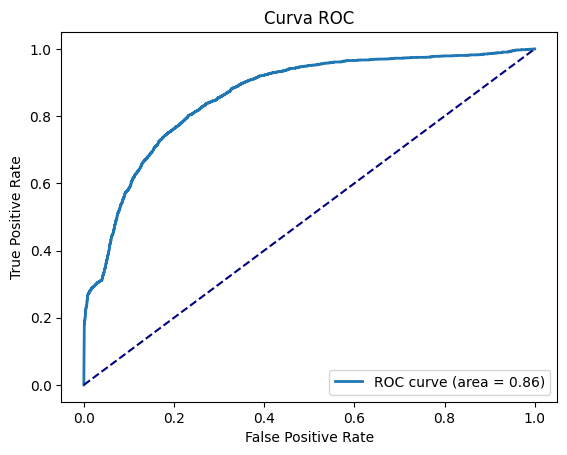

In [30]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

y_pred_proba = gnb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Con la matriz de confusión podemos ver cuantas predicciones fueron correctas e incorrectas**

1. Verdaderos positivos
2. Falsos positivos
3. Falsos negativos
4. Verdaderos negativos

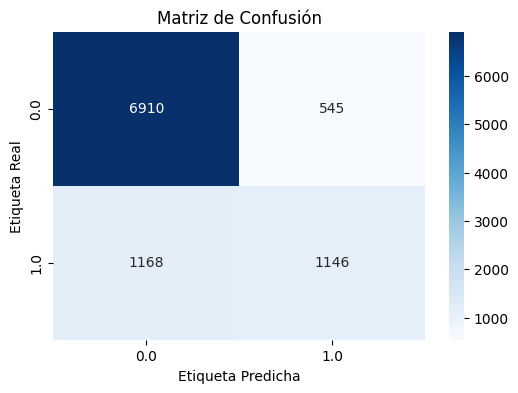

In [31]:
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

**En esta parte, hago la comparación con el modelo DecisionTreeClassifier**

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_resampled, y_resampled)

y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      7455
         1.0       0.58      0.81      0.67      2314

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.85      0.81      0.82      9769



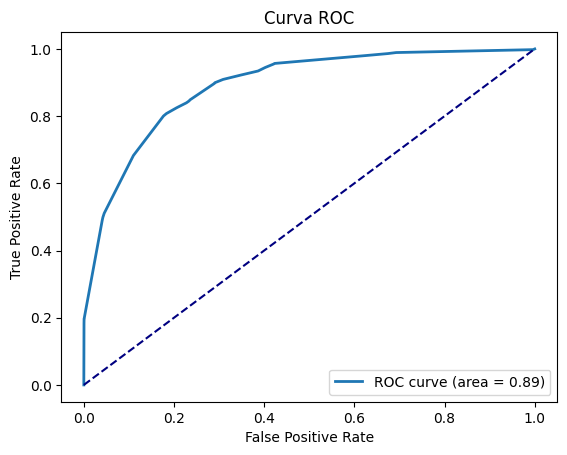

In [33]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

y_pred_proba = dt.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Y por último la comparación de las dos curvas roc juntas**

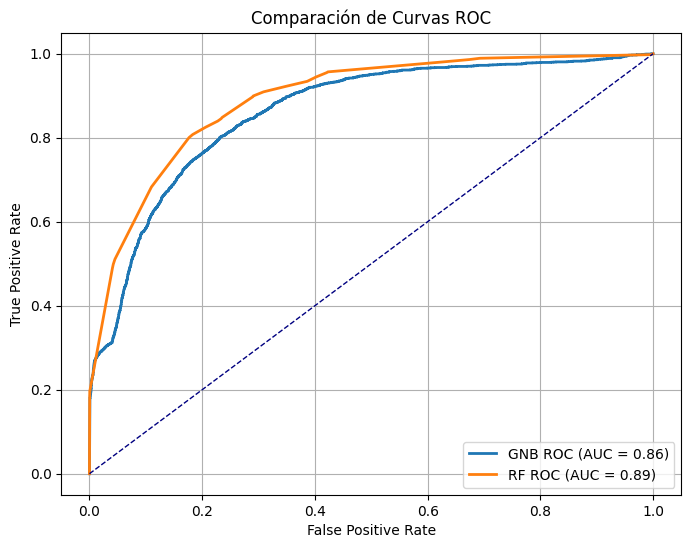

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba_gnb = gnb.predict_proba(X_test)[:, 1]
y_pred_proba_rf = dt.predict_proba(X_test)[:, 1]

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_gnb, tpr_gnb, lw=2, label=f'GNB ROC (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'RF ROC (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparación de Curvas ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
